In [ ]:
#!pip install tensorflow==1.14.0
!pip install --upgrade tensorflow

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os,sys
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

LABELS = ["Normal", "Cancer"]

In [ ]:
import time
start = time.time()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Blood Cancer/val/val"
print(os.listdir(path))


['Cancer', 'Normal']


In [ ]:
print(os.listdir("/content/drive/MyDrive/Blood Cancer/test/test"))

['Normal', 'Cancer']


In [ ]:
print(os.listdir("/content/drive/MyDrive/Blood Cancer/train/train"))

['Cancer', 'Normal']


In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/Blood Cancer/train/train"
TEST_DIR =  "/content/drive/MyDrive/Blood Cancer/test/test"

## Preprocessing

In [ ]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['Cancer']:
                label = 0
            elif nextdir in ['Normal']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [ ]:
def preprocessing_data(Dir):
    X = []
    y = []

    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir +"/"+ nextdir

        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)

    X = np.asarray(X)
    y = np.asarray(y)

    return X,y

In [ ]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['Cancer']:
                label = 0
            elif nextDir in ['Normal']:
                label = 1
            else:
                label = 2

            # Fix: Use os.path.join to create the correct path
            temp = os.path.join(Dir, nextDir)

            for file in tqdm(os.listdir(temp)):
                # Fix: Use os.path.join to create the correct path for the image
                img = cv2.imread(os.path.join(temp, file))
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)

    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

### splitting training data


In [ ]:
X_train, y_train = get_data(TRAIN_DIR)

100%|██████████| 2483/2483 [01:03<00:00, 39.41it/s]


In [ ]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 629/629 [00:11<00:00, 53.30it/s]


In [ ]:
print(X_train.shape,'\n',X_test.shape)

(4961, 150, 150, 3) 
 (1249, 150, 150, 3)


In [ ]:
print(y_train.shape,'\n',y_test.shape)

(4961,) 
 (1249,)


In [ ]:
#### np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.

In [ ]:
# from keras.utils.np_utils import to_categorical

# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)
from tensorflow.keras.utils import to_categorical

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes=2) # Assuming you have 2 classes
y_test = to_categorical(y_test, num_classes=2) # Assuming you have 2 classes

In [ ]:
print(y_train.shape,'\n',y_test.shape)

(4961, 2) 
 (1249, 2)


In [ ]:
Pimages = os.listdir(TRAIN_DIR + "/Cancer/")
Nimages = os.listdir(TRAIN_DIR + "/Normal/")


(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


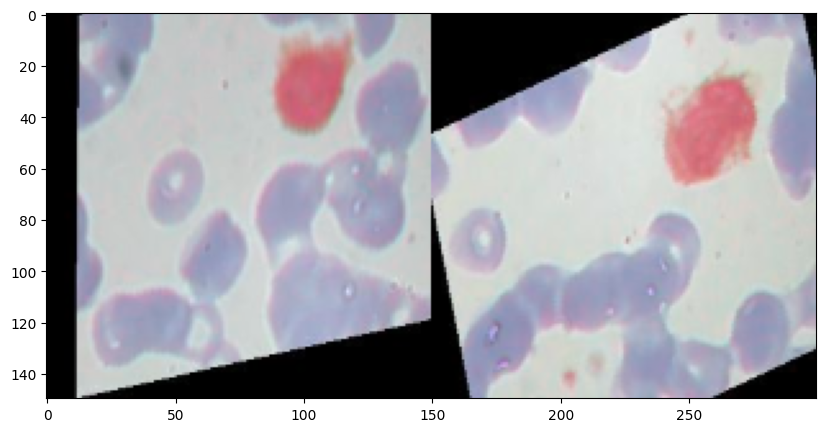

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


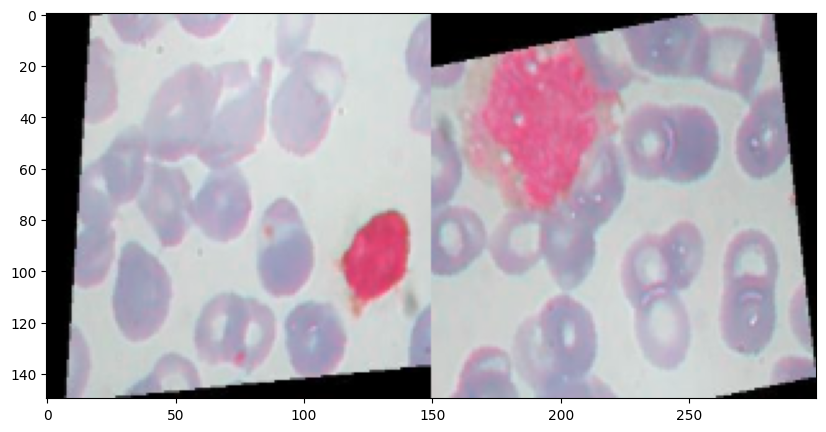

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


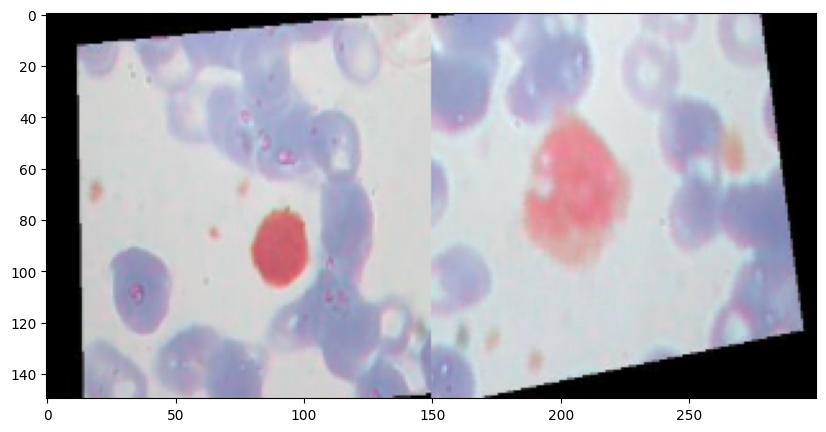

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


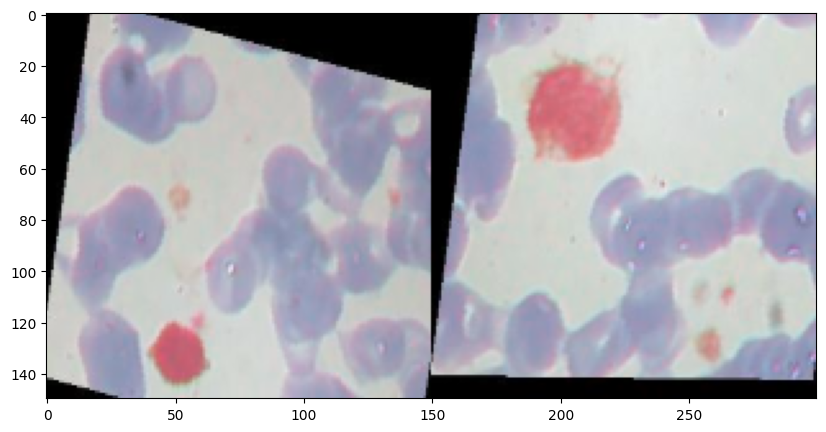

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


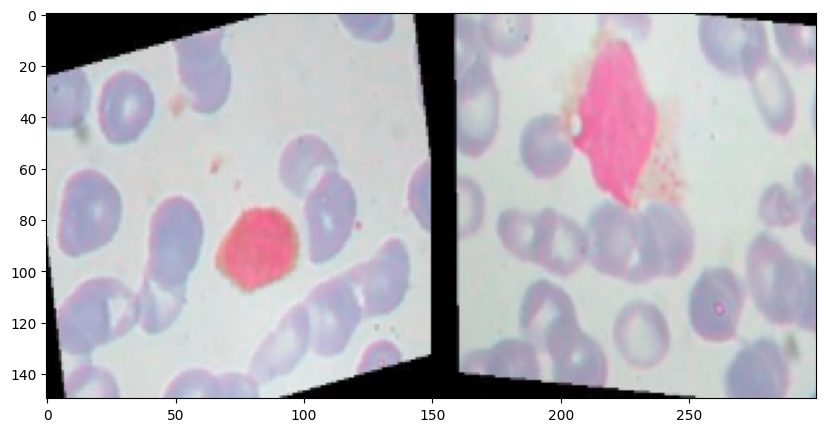

In [ ]:
import matplotlib.pyplot as plt
import os # Import os for path manipulation
import cv2
import skimage.transform
import numpy as np


def plotter(i):
    # Construct image paths using os.path.join
    image_path_p = os.path.join(TRAIN_DIR, "Cancer", Pimages[i])
    image_path_n = os.path.join(TRAIN_DIR, "Normal", Nimages[i])

    # Check if images exist before reading
    if not os.path.exists(image_path_p):
        print(f"Error: Image not found at {image_path_p}")
        return # Stop function execution if image not found

    if not os.path.exists(image_path_n):
        print(f"Error: Image not found at {image_path_n}")
        return # Stop function execution if image not found

    imagep1 = cv2.imread(image_path_p)
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3), mode='reflect')
    imagen1 = cv2.imread(image_path_n)
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No CANCER Vs (Right) - CANCER")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10, 5))
    plt.imshow(pair)
    plt.show()

for i in range(0, 5):
    plotter(i)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#function
def train_test_rmse(x,y):
    x = Iris_data[x]
    y = Iris_data[y]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(accuracy_score(y_test, y_pred))  # or you can save it in variable and return it
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

<Axes: ylabel='count'>

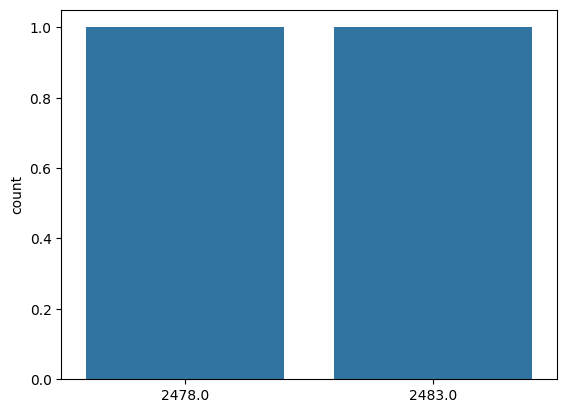

In [ ]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

In [ ]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [ ]:
filepath="weights.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:

from tensorflow.keras.utils import to_categorical

In [ ]:
!pip install scikeras  # Install the necessary package for KerasClassifier with TensorFlow

In [ ]:
from keras import *
from keras.models import Sequential
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam, SGD , RMSprop
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.00005),
                  metrics=['accuracy'])

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 150, 150, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 360000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │      23,040,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,112,274 (88.17 MB)

 Trainable params: 23,112,274 (88.17 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
batch_size = 256
epochs = 10

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.5066 - loss: 0.7020 - val_accuracy: 0.5036 - val_loss: 0.6931 - learning_rate: 5.0000e-05
Epoch 2/10
  1/156 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.3750 - loss: 0.6932

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.4978 - loss: 0.6931 - val_accuracy: 0.5036 - val_loss: 0.6931 - learning_rate: 5.0000e-05
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.5064 - loss: 0.6931 - val_accuracy: 0.5036 - val_loss: 0.6931 - learning_rate: 5.0000e-05
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.5036 - val_loss: 0.6931 - learning_rate: 5.0000e-05
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.5026 - loss: 0.6931 - val_accuracy: 0.4964 - val_loss: 0.6931 - learning_rate: 5.0000e-05
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.4986 - loss: 0.6931 - val_accuracy: 0.5036 - val_loss: 0.6931 - learning_rate: 5.0000e-05
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.4840 - loss: 0.6931 - val_accuracy: 0.4964 - val_loss: 0.6931 - learning_rate: 5.0000e-05
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - 

In [ ]:
model.save('blood_cancer_prediction.h5')

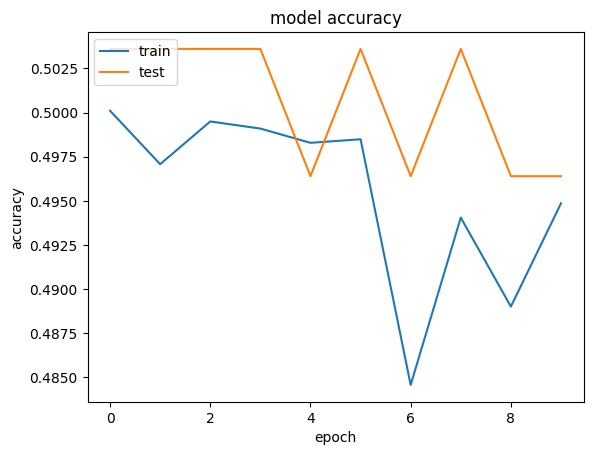

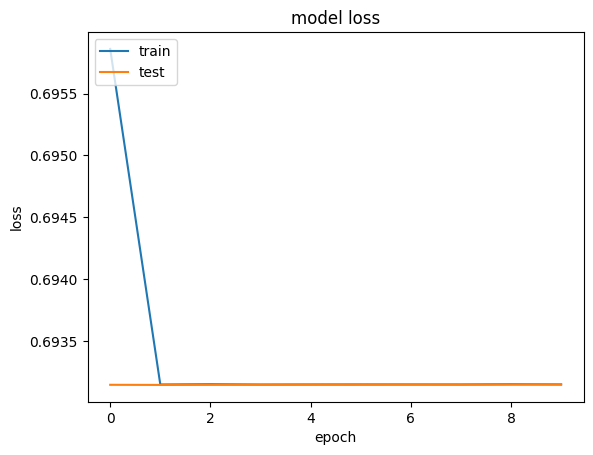

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [ ]:
cnf = confusion_matrix(y_true, pred )
np.set_printoptions(precision=2)
cnf

array([[  0, 629],
       [  0, 620]])

In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy Score :',accuracy_score(y_true, pred))

Accuracy Score : 0.49639711769415534


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       629
           1       0.50      1.00      0.66       620

    accuracy                           0.50      1249
   macro avg       0.25      0.50      0.33      1249
weighted avg       0.25      0.50      0.33      1249



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import precision_recall_curve

precision , recall , thresolds = precision_recall_curve(y_true, pred)

In [ ]:
precision

array([0.5, 1. ])

In [ ]:
recall

array([1., 0.])

In [ ]:
thresolds

array([1])

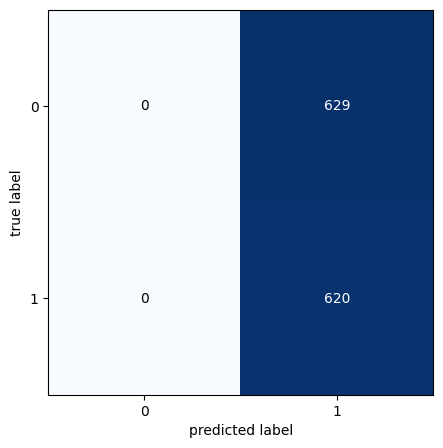

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Cancer


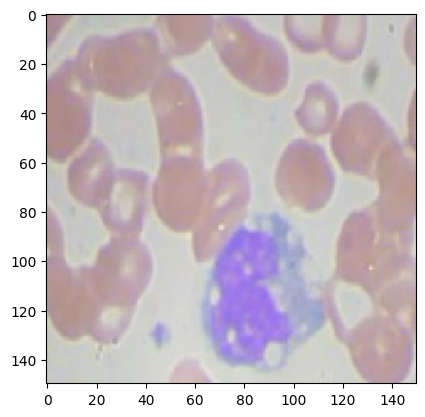

In [ ]:
from keras.preprocessing import image
import numpy as np

img = image.load_img('/content/drive/MyDrive/Blood Cancer/val/val/Cancer/_2_4392.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Get the model's predictions
predictions = model.predict(images, batch_size=10)

# Get the class with the highest probability
classes = np.argmax(predictions, axis=1)

if classes == [1]:
   print("Cancer")
elif classes == [0]:
  print("Normal")
else:
   print("Sorry")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Normal


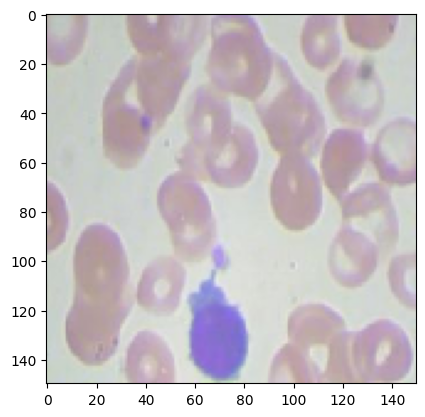

In [ ]:
from keras.preprocessing import image
import numpy as np

img = image.load_img('/content/drive/MyDrive/Blood Cancer/val/val/Normal/_3_7545.jpeg', target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])


predictions = model.predict(images, batch_size=10)  # Get the model's predictions
classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability


if classes == [1]:
   print("Normal")
elif classes == [0]:
  print("Cancer")
else:
   print("Sorry")